# Fourier point source

In [1]:
import numpy as np
import jax.numpy as jnp
from matplotlib import pyplot as plt

from simplecryoem.forwardmodel import interpolate, project
from simplecryoem.forwardmodel.projection import rotate_z0

In [2]:
%load_ext autoreload
%autoreload 2

### Important: in the Fourier domain, the point is rotated in the fftshifted coordinates (i.e. 0 in the centre) - working now

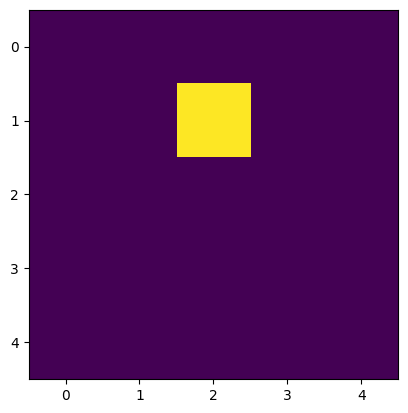

In [3]:
nx = 5
dx = 0.2

v = np.zeros([nx, nx, nx])
v[1, 2, 2] = 1
v = jnp.array(v)

plt.imshow(v[:, :, 2])

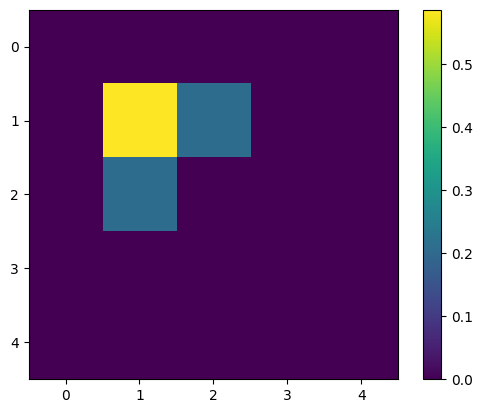

In [12]:
x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

x_grid = np.array([x_freq[1], len(x_freq)])
y_grid = np.array([y_freq[1], len(y_freq)])
z_grid = np.array([z_freq[1], len(z_freq)])

angles = jnp.array([0, 0, jnp.pi / 4])
shifts = jnp.array([0, 0])
ctf_params = jnp.array([jnp.nan])

vr = project(
    jnp.fft.ifftshift(v),
    angles,
    shifts,
    ctf_params,
    x_grid,
    x_grid,
    interpolation_method="tri",
)
vr = jnp.fft.fftshift(vr.reshape(v.shape[0], v.shape[1]))
plt.imshow(jnp.real(vr))
plt.colorbar()

### Do the steps in the project function

#### Note:
For the point on the edge of the square as below and rotation by $\pi/4$, after rotation _of the coordinates_, the point appears in a corner, probably unexpectedly. However, this is the intended behaviour when one rotates the coordinates and the object is periodic.

This becomes clear when we track multiple points after the rotation, see ```Fourier_slice_rotation.ipynb```.

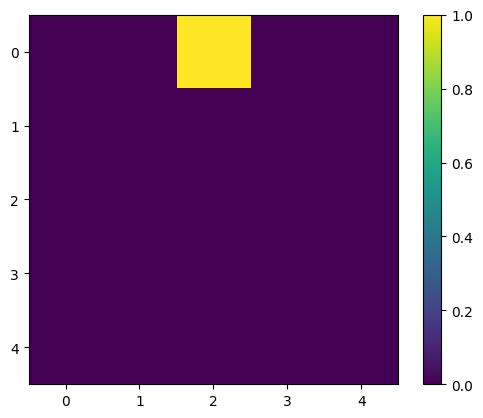

In [13]:
nx = 5
dx = 0.2

v = np.zeros([nx, nx, nx])
v[0, 2, 2] = 1

v = jnp.array(v)

plt.imshow(v[:, :, 2])
plt.colorbar()

In [14]:
angles = jnp.array([0, 0, jnp.pi / 4])

slice_coords = rotate_z0(x_grid, angles)

In [15]:
slice_interp = interpolate(slice_coords, x_grid, jnp.fft.ifftshift(v), "nn")
slice_interp_2d = jnp.fft.fftshift(slice_interp.reshape(v.shape[0], v.shape[1]))

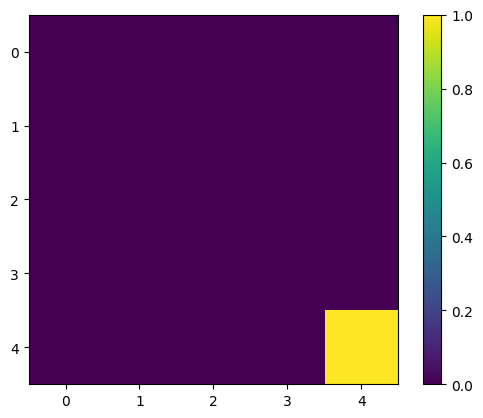

In [16]:
plt.imshow(slice_interp_2d)
plt.colorbar()